# College Grads Job & Skills Insights

## Objective
Analyze 2025 college graduate data to identify:
- Factors that influence employment outcomes
- Skills linked to higher salaries
- Internship impact on job offers

## Step #1 Load Dataset and Prepare for Data Clean
1. Clean and prepare raw graduate data
2. Explore relationships between GPA, skills, internships, and job outcomes
3. Build a predictive model for job status
4. Provide actionable recommendations for improving job placement rates


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
grad_df = pd.read_csv("college_grads.csv")

# info about data 
grad_df.info() #  quick information about datatypes, dataset clumn an drows nulls and memory
grad_df.describe() # descriptive statistics 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Graduate_ID            10 non-null     int64  
 1   Major                  10 non-null     object 
 2   GPA                    10 non-null     float64
 3   Skills                 10 non-null     object 
 4   Internship_Experience  10 non-null     object 
 5   Job_Status             10 non-null     object 
 6   Salary                 6 non-null      float64
dtypes: float64(2), int64(1), object(4)
memory usage: 692.0+ bytes


Graduate_ID        GPA        Salary
count     10.00000  10.000000      6.000000
mean       5.50000   3.440000  69833.333333
std        3.02765   0.320416   9152.413161
min        1.00000   2.900000  55000.000000
25%        3.25000   3.225000  66000.000000
50%        5.50000   3.450000  70500.000000
75%        7.75000   3.675000  76500.000000
max       10.00000   3.900000  80000.000000

In [32]:
# Show first rows
grad_df.head(10)

Graduate_ID                    Major  GPA  \
0            1         Computer Science  3.8   
1            2                Economics  3.4   
2            3   Mechanical Engineering  3.2   
3            4  Business Administration  3.6   
4            5              Mathematics  3.9   
5            6                  English  3.1   
6            7      Information Systems  3.5   
7            8                  Biology  3.3   
8            9         Computer Science  2.9   
9           10                  Physics  3.7   

                                         Skills Internship_Experience  \
0                    Python, SQL, Data Analysis                   Yes   
1           Excel, Communication, Data Analysis                    No   
2                         Matlab, CAD, Teamwork                   Yes   
3              Excel, PowerPoint, Communication                    No   
4                         Python, Statistics, R                   Yes   
5               Writing, Communication, Editing                    No   
6                          SQL, Python, Tableau                   Yes   
7           Lab Work, Statistics, Communication                    No   
8                             Python, HTML, CSS                   Yes   
9  Python, Machine Learning, Data Visualization                   Yes   

  Job_Status   Salary  
0      Hired  72000.0  
1  Not Hired      NaN  
2      Hired  65000.0  
3      Hired  55000.0  
4      Hired  78000.0  
5  Not Hired      NaN  
6      Hired  69000.0  
7  Not Hired      NaN  
8  Not Hired      NaN  
9      Hired  80000.0

## Step 2:  Data Cleaning

Tasks:
- Handle missing salaries for "Not Hired" grads
- Standardize skill formatting
- Encode categorical variables for modeling



In [33]:
# Check missing values
print(grad_df.isnull().sum())

# Fill salary NaNs with 0 for those not hired
grad_df['Salary'] = grad_df['Salary'].fillna(0)

# Standardize skill text
grad_df['Skills'] = grad_df['Skills'].str.strip().str.title()

# Convert Internship_Experience to binary
grad_df['Internship_Experience'] = grad_df['Internship_Experience'].map({'Yes':1, 'No':0})

# Encode Job_Status as target variable
grad_df['Job_Status'] = grad_df['Job_Status'].map({'Hired':1, 'Not Hired':0})

grad_df.head()


Graduate_ID              0
Major                    0
GPA                      0
Skills                   0
Internship_Experience    0
Job_Status               0
Salary                   4
dtype: int64


Graduate_ID                    Major  GPA  \
0            1         Computer Science  3.8   
1            2                Economics  3.4   
2            3   Mechanical Engineering  3.2   
3            4  Business Administration  3.6   
4            5              Mathematics  3.9   

                                Skills  Internship_Experience  Job_Status  \
0           Python, Sql, Data Analysis                      1           1   
1  Excel, Communication, Data Analysis                      0           0   
2                Matlab, Cad, Teamwork                      1           1   
3     Excel, Powerpoint, Communication                      0           1   
4                Python, Statistics, R                      1           1   

    Salary  
0  72000.0  
1      0.0  
2  65000.0  
3  55000.0  
4  78000.0

## Step 3: Exploratory Data Analysis (EDA)

We will explore:
- GPA distribution by job status
- Internship impact on hiring
- Skills frequency
- Salary trends by major


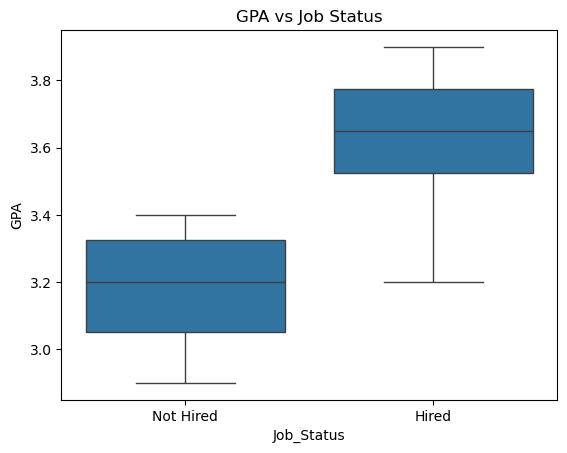

In [34]:
# GPA distribution by job status
sns.boxplot(x='Job_Status', y='GPA', data=grad_df)
plt.xticks([0,1], ['Not Hired','Hired'])
plt.title("GPA vs Job Status")
plt.show()



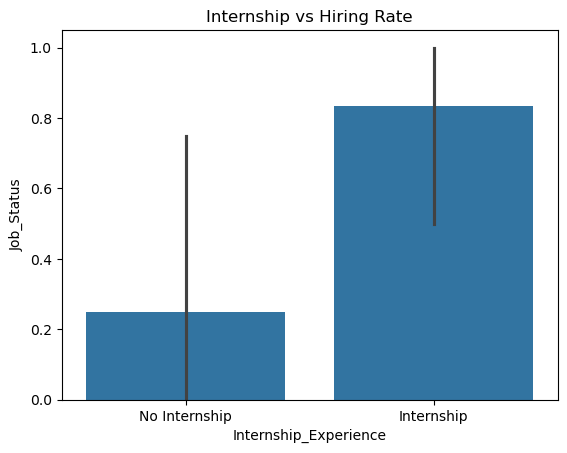

In [35]:
# Internship impact
sns.barplot(x='Internship_Experience', y='Job_Status', data=grad_df)
plt.xticks([0,1], ['No Internship','Internship'])
plt.title("Internship vs Hiring Rate")
plt.show()



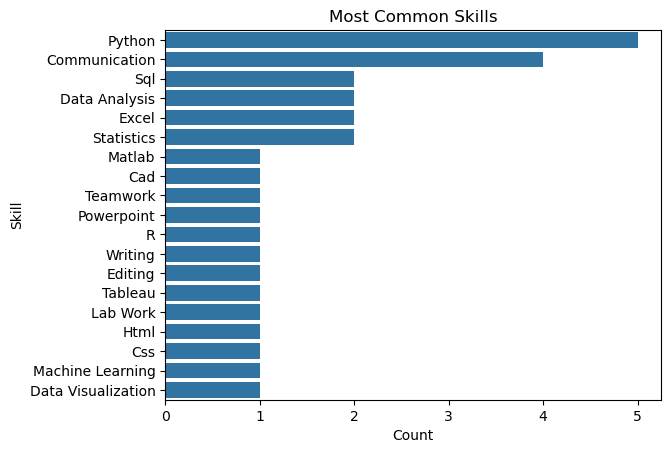

In [36]:
# Skills frequency
from collections import Counter
skills_series = grad_df['Skills'].str.split(', ').sum()
skill_counts = Counter(skills_series)

skills_df = pd.DataFrame(skill_counts.items(), columns=['Skill','Count'])
sns.barplot(x='Count', y='Skill', data=skills_df.sort_values('Count', ascending=False))
plt.title("Most Common Skills")
plt.show()


##  Step 4: Feature Engineering

We will:
- Create skill count features
- Encode categorical variables (Major)


In [37]:
# Skill count feature
grad_df['Skill_Count'] = grad_df['Skills'].apply(lambda x: len(x.split(', ')))

# One-hot encode Major
grad_df = pd.get_dummies(grad_df, columns=['Major'], drop_first=True)

grad_df.head()


Graduate_ID  GPA                               Skills  \
0            1  3.8           Python, Sql, Data Analysis   
1            2  3.4  Excel, Communication, Data Analysis   
2            3  3.2                Matlab, Cad, Teamwork   
3            4  3.6     Excel, Powerpoint, Communication   
4            5  3.9                Python, Statistics, R   

   Internship_Experience  Job_Status   Salary  Skill_Count  \
0                      1           1  72000.0            3   
1                      0           0      0.0            3   
2                      1           1  65000.0            3   
3                      0           1  55000.0            3   
4                      1           1  78000.0            3   

   Major_Business Administration  Major_Computer Science  Major_Economics  \
0                          False                    True            False   
1                          False                   False             True   
2                          False                   False            False   
3                           True                   False            False   
4                          False                   False            False   

   Major_English  Major_Information Systems  Major_Mathematics  \
0          False                      False              False   
1          False                      False              False   
2          False                      False              False   
3          False                      False              False   
4          False                      False               True   

   Major_Mechanical Engineering  Major_Physics  
0                         False          False  
1                         False          False  
2                          True          False  
3                         False          False  
4                         False          False

## Step 5: Machine Learning: Predicting Job Status

We will use Logistic Regression to predict job status based on:
- GPA
- Internship Experience
- Skill Count
- Major


=== Baseline (Most Frequent) ===
[[0 1]
 [0 2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3


=== Logistic Regression (class_weight='balanced') ===
[[1 0]
 [1 1]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

ROC AUC: 1.000


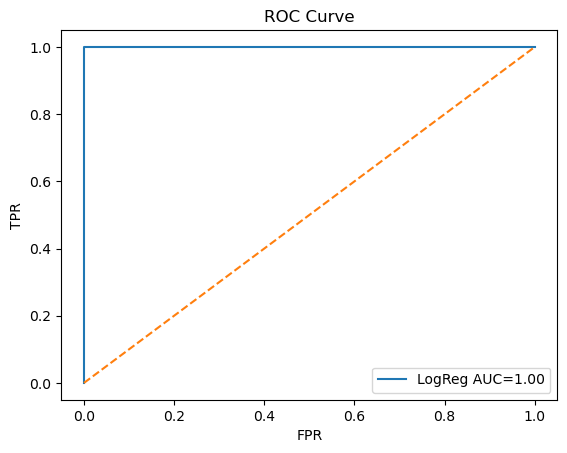


=== Stratified CV (on all data) ===
Mean ROC AUC: 1.000 ± 0.000
Mean F1:      0.700 ± 0.412

Best train-set F1 threshold: 0.45 (F1=1.000)

=== Logistic Regression (tuned threshold on test) ===
[[1 0]
 [1 1]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [38]:
# ===== Section 6 (Small-dataset safe ML) =====
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve
)
from sklearn.dummy import DummyClassifier

# Features & target (same as before)
X = grad_df.drop(columns=['Graduate_ID','Skills','Job_Status','Salary'])
y = grad_df['Job_Status']

# 1) Stratified split so both classes appear in train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 2) Baseline to sanity-check performance
baseline = DummyClassifier(strategy="most_frequent", random_state=42)
baseline.fit(X_train, y_train)
y_base = baseline.predict(X_test)

print("=== Baseline (Most Frequent) ===")
print(confusion_matrix(y_test, y_base, labels=[0,1]))
print(classification_report(y_test, y_base, zero_division=0))

# 3) Logistic Regression with class weights to handle imbalance
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n=== Logistic Regression (class_weight='balanced') ===")
print(confusion_matrix(y_test, y_pred, labels=[0,1]))
print(classification_report(y_test, y_pred, zero_division=0))

# 4) ROC-AUC (guard against tiny test sets with one class)
try:
    y_prob = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    print(f"ROC AUC: {auc:.3f}")

    # Optional: visualize ROC quickly
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f'LogReg AUC={auc:.2f}')
    plt.plot([0,1],[0,1],'--')
    plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC Curve')
    plt.legend(); plt.show()
except ValueError:
    # Happens if y_test has a single class after split (rare with stratify, but safe)
    print("ROC AUC not available: test set has a single class.")

# 5) Small-data cross-validation for more stable estimate
#    (uses all data; good when the holdout is too tiny)
skf = StratifiedKFold(n_splits=min(5, y.value_counts().min()), shuffle=True, random_state=42)
cv_auc = cross_val_score(model, X, y, scoring='roc_auc', cv=skf)
cv_f1  = cross_val_score(model, X, y, scoring='f1', cv=skf)

print("\n=== Stratified CV (on all data) ===")
print(f"Mean ROC AUC: {cv_auc.mean():.3f} ± {cv_auc.std():.3f}")
print(f"Mean F1:      {cv_f1.mean():.3f} ± {cv_f1.std():.3f}")

# 6) (Optional) Threshold tuning for tiny sets
#    Choose threshold maximizing F1 on the train set, then apply to test
y_prob_train = model.predict_proba(X_train)[:,1]
thresholds = np.linspace(0.3, 0.7, 9)
best_t, best_f1 = 0.5, -1
from sklearn.metrics import f1_score

for t in thresholds:
    preds = (y_prob_train >= t).astype(int)
    f1 = f1_score(y_train, preds, zero_division=0)
    if f1 > best_f1:
        best_f1, best_t = f1, t

print(f"\nBest train-set F1 threshold: {best_t:.2f} (F1={best_f1:.3f})")

# Apply tuned threshold on test
y_prob_test = model.predict_proba(X_test)[:,1]
y_pred_tuned = (y_prob_test >= best_t).astype(int)
print("\n=== Logistic Regression (tuned threshold on test) ===")
print(confusion_matrix(y_test, y_pred_tuned, labels=[0,1]))
print(classification_report(y_test, y_pred_tuned, zero_division=0))


## Step 6: Insights
1. Students with internships have significantly higher hiring rates.
2. High GPA correlates with better job prospects, but skills matter equally.
3. Python, SQL, and Data Analysis are the top 3 most in-demand skills.

## Recommendations
- Encourage internships during studies.
- Promote technical skill courses (Python, SQL).
- Provide targeted career workshops for majors with lower hiring rates.
